In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car_data.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
data.shape

(8128, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
data = data.drop(columns=['name', 'max_power', 'torque'], axis=1)

In [6]:
data.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,5.0
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,5.0
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,4.0
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,5.0
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,5.0


In [7]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
data.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
seats            221
dtype: int64

In [9]:
data['mileage'] = data['mileage'].str.replace('kmpl', '')
data['mileage'] = data['mileage'].str.replace('km/kg', '')
data['engine'] = data['engine'].str.replace('CC', '')

In [10]:
data.sample(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
7169,2017,350000,30000,Petrol,Individual,Manual,First Owner,23.01,999,5.0
7627,2007,275000,200000,Diesel,Individual,Manual,Second Owner,16.6,1896,5.0
2747,2016,711000,120000,Diesel,Individual,Manual,First Owner,24.52,1248,7.0
4392,2015,425000,75000,Petrol,Dealer,Manual,First Owner,20.52,1197,5.0
3832,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487,5.0
5208,2016,660000,110000,Diesel,Individual,Manual,First Owner,21.19,1396,5.0
2843,2013,550000,100600,Diesel,Individual,Manual,Third Owner,20.46,1461,5.0
5714,1997,29999,80000,Petrol,Individual,Manual,Third Owner,16.1,796,4.0
7860,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999,5.0
3342,2011,340000,100000,Diesel,Individual,Manual,Second Owner,13.6,2523,7.0


In [11]:
data['mileage'] = pd.to_numeric(data['mileage'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN
data['engine'] = pd.to_numeric(data['engine'], errors='coerce')
data['seats'] = pd.to_numeric(data['seats'], errors='coerce')

In [12]:
data['mileage'].fillna(data['mileage'].mean(), inplace=True)
data['engine'].fillna(data['engine'].mean(), inplace=True)
data['seats'].fillna(data['seats'].mean(), inplace=True)

In [13]:
data['seats'] = data['seats'].astype('int64')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   seats          8128 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 635.1+ KB


In [15]:
data.duplicated().sum()

1222

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(6906, 10)

In [18]:
data.describe()

,year,selling_price,km_driven,mileage,engine,seats
count,6906.000000,6.906000e+03,6.906000e+03,6906.000000,6906.000000,6906.000000
mean,2013.416160,5.174481e+05,7.401497e+04,19.463069,1431.911816,5.421373
std,4.080862,5.203939e+05,5.836141e+04,3.989281,485.928711,0.972452
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.950000,1197.000000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.418783,1248.000000,5.000000
75%,2017.000000,6.347500e+05,1.000000e+05,22.320000,1498.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [19]:
def box_plot_uni(data: pd.DataFrame = None, column: str = None):
    sns.boxplot(data=data, x=column)
    plt.title(f'Distribution of {column}')

## Treating outliers on `year` feature

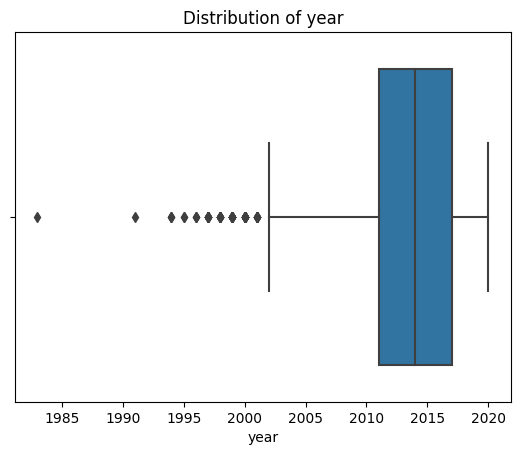

In [20]:
box_plot_uni(data, 'year')

- The actual minimum year is `2002` and maximum year is `2020`
- Here we can see minimum year is `1983`. So, it is said to be an outliers. Have to treat it using `IQR` method.

In [21]:
def outliers_handing(data: pd.DataFrame, column: str):
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    upper_thersold = data[column].quantile(0.75) + (1.5 * iqr)
    lower_thersold = data[column].quantile(0.25) - (1.5 * iqr)
    print(f"IQR: {iqr}\nUpper_thersold: {upper_thersold}\nLower_thresold: {lower_thersold}")

In [22]:
outliers_handing(data, 'year')

IQR: 6.0
Upper_thersold: 2026.0
Lower_thresold: 2002.0


In [23]:
iqr = data['year'].quantile(0.75) - data['year'].quantile(0.25)
upper_thersold = data['year'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['year'].quantile(0.25) - (1.5 * iqr)
data['year'] = data['year'].clip(lower_thersold, upper_thersold)

In [24]:
data['year'].describe()

count    6906.000000
mean     2013.456849
std         3.936639
min      2002.000000
25%      2011.000000
50%      2014.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

- After treating outliers the minimum year treated as `2002`.

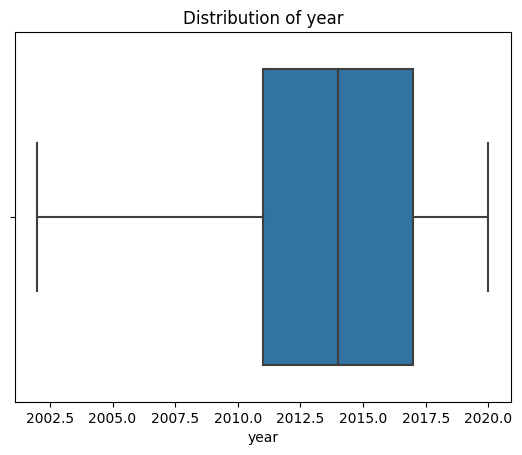

In [25]:
box_plot_uni(data, 'year')

- Can also cross verify using box plot. Now there is no outliers in `year` feature.

## Treating outliers on `selling_price`  feature

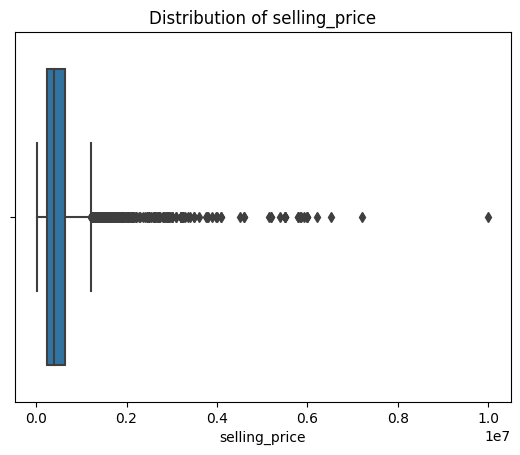

In [26]:
box_plot_uni(data, 'selling_price')

- The actuall minimum price is around `30Thousand` and maximum price is `12.1Lakhs`.
- But here the maximum price is exited than the actual max price, which is considered to be an outliers.
- So, have to treat the outliers.

In [27]:
outliers_handing(data, 'selling_price')

IQR: 384750.0
Upper_thersold: 1211875.0
Lower_thresold: -327125.0


In [28]:
data['selling_price'].describe()

count    6.906000e+03
mean     5.174481e+05
std      5.203939e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.347500e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [29]:
iqr = data['selling_price'].quantile(0.75) - data['selling_price'].quantile(0.25)
upper_thersold = data['selling_price'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['selling_price'].quantile(0.25) - (1.5 * iqr)
data['selling_price'] = data['selling_price'].clip(lower_thersold, upper_thersold)

In [30]:
data['selling_price'].describe()

count    6.906000e+03
mean     4.706344e+05
std      2.949897e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.347500e+05
max      1.211875e+06
Name: selling_price, dtype: float64

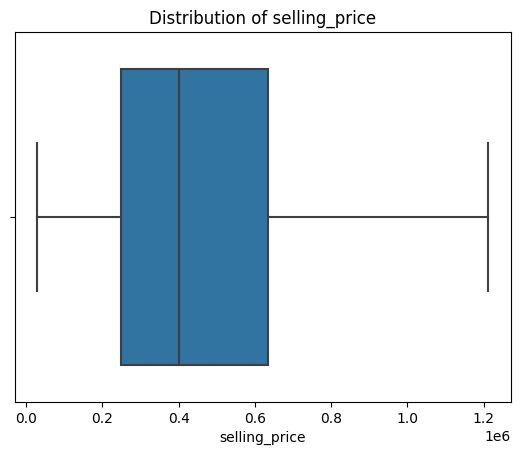

In [31]:
box_plot_uni(data, 'selling_price')

- After treating the outliers, the maximum `selling price` treated as `12.1Lakhs`.

- So, now there is no outliers in `selling_price` feature.

## Treating outliers on `km_driven`  feature

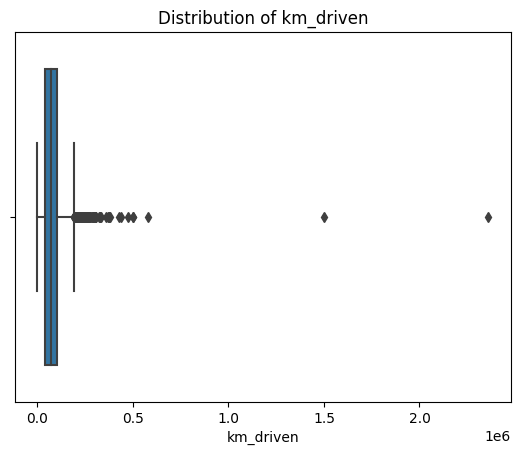

In [32]:
box_plot_uni(data, 'km_driven')

- The actual minimum `km driven` is `1km` and maximum is `1.9Lakhs km`

- But here the maximum `km driven` is exited to `230k km` than the actual max `km driven`. Which is considered to be an outliers
- So, have to treat the outliers.

In [33]:
outliers_handing(data, 'km_driven')

IQR: 60000.0
Upper_thersold: 190000.0
Lower_thresold: -50000.0


In [34]:
data['km_driven'].describe()

count    6.906000e+03
mean     7.401497e+04
std      5.836141e+04
min      1.000000e+00
25%      4.000000e+04
50%      7.000000e+04
75%      1.000000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

In [35]:
iqr = data['km_driven'].quantile(0.75) - data['km_driven'].quantile(0.25)
upper_thersold = data['km_driven'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['km_driven'].quantile(0.25) - (1.5 * iqr)
data['km_driven'] = data['km_driven'].clip(lower_thersold, upper_thersold)

In [36]:
data['km_driven'].describe()

count      6906.000000
mean      72211.741095
std       43424.994352
min           1.000000
25%       40000.000000
50%       70000.000000
75%      100000.000000
max      190000.000000
Name: km_driven, dtype: float64

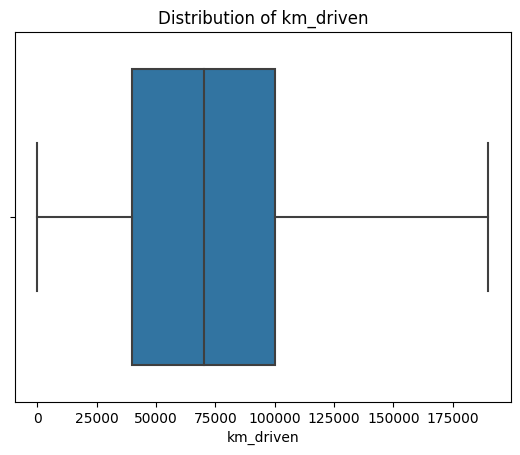

In [37]:
box_plot_uni(data, 'km_driven')

- After treating the outliers, the maximum `km driven` treated as `1.9Lakhs km`.

- So, now there is no outliers in `km_driven` feature.

## Treating outliers on `mileage`  feature

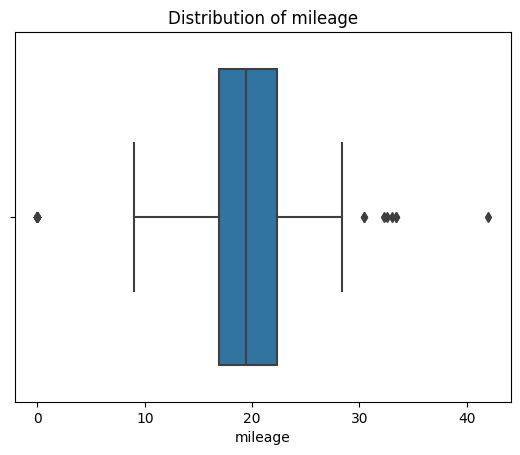

In [38]:
box_plot_uni(data, 'mileage')

- The actual minimum `mileage` is around `9 kmpl` and maximum is `30 kmpl`.

- But here the minimum and maximum exited than the actual are `min=22 kmpl` and `max=42 kmpl`, which is considered to be an outliers.
- So, have to treat the outliers.

In [39]:
outliers_handing(data, 'mileage')

IQR: 5.370000000000001
Upper_thersold: 30.375
Lower_thresold: 8.894999999999998


In [40]:
data['mileage'].describe()

count    6906.000000
mean       19.463069
std         3.989281
min         0.000000
25%        16.950000
50%        19.418783
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [41]:
iqr = data['mileage'].quantile(0.75) - data['mileage'].quantile(0.25)
upper_thersold = data['mileage'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['mileage'].quantile(0.25) - (1.5 * iqr)
data['mileage'] = data['mileage'].clip(lower_thersold, upper_thersold)

In [42]:
data['mileage'].describe()

count    6906.000000
mean       19.478830
std         3.902776
min         8.895000
25%        16.950000
50%        19.418783
75%        22.320000
max        30.375000
Name: mileage, dtype: float64

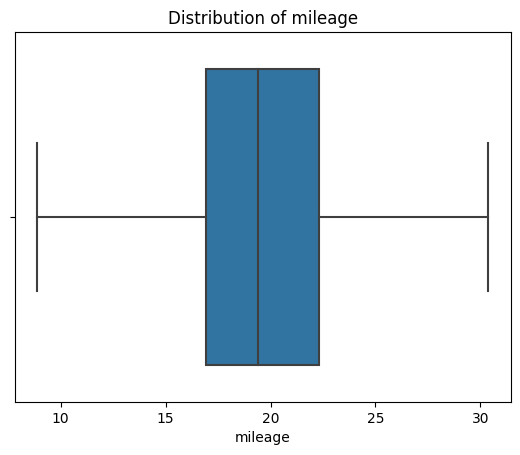

In [43]:
box_plot_uni(data, 'mileage')

- After treating the outliers, the minimum and maximum `mileage` treated as `min=9 kmpl and max=30 kmpl`.

- So, now there is no outliers in `mileage` feature.

## Treating outliers on `engine`  feature

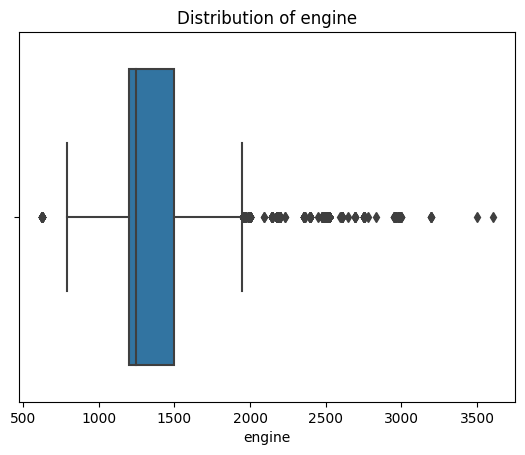

In [44]:
box_plot_uni(data, 'engine')

- The actual minimum `engine` is around `745 CC` and maximum is `1950 CC`.

- But here the minimum and maximum exited than the actual are `min=624 CC` and `max=3604 CC`, which is considered to be an outliers.
- So, have to treat the outliers.

In [45]:
outliers_handing(data, 'engine')

IQR: 301.0
Upper_thersold: 1949.5
Lower_thresold: 745.5


In [46]:
data['engine'].describe()

count    6906.000000
mean     1431.911816
std       485.928711
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      3604.000000
Name: engine, dtype: float64

In [47]:
iqr = data['engine'].quantile(0.75) - data['engine'].quantile(0.25)
upper_thersold = data['engine'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['engine'].quantile(0.25) - (1.5 * iqr)
data['engine'] = data['engine'].clip(lower_thersold, upper_thersold)

In [48]:
data['engine'].describe()

count    6906.000000
mean     1362.194686
std       340.478879
min       745.500000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      1949.500000
Name: engine, dtype: float64

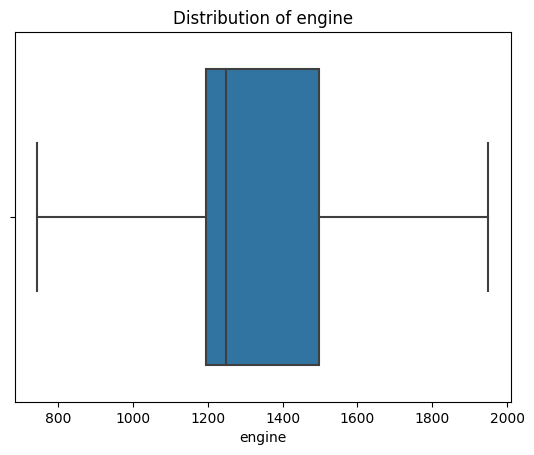

In [49]:
box_plot_uni(data, 'engine')

- After treating the outliers, the minimum and maximum `engine` treated as `min=745 CC and max=1950 CC`.

- So, now there is no outliers in `engine` feature.

## Treating outliers on `seats`  feature

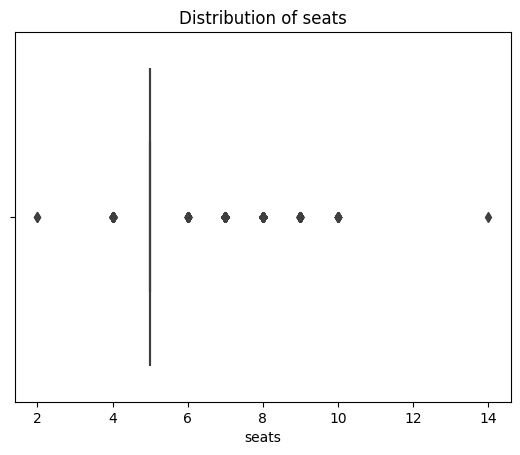

In [50]:
box_plot_uni(data, 'seats')

- The actual minimum and maximum `seats` only `5`.

- But here the minimum and maximum exited than the actual are `min=2 seats` and `max=14 seats`, which is considered to be an outliers.
- So, have to treat the outliers.

In [51]:
outliers_handing(data, 'seats')

IQR: 0.0
Upper_thersold: 5.0
Lower_thresold: 5.0


In [52]:
data['seats'].describe()

count    6906.000000
mean        5.421373
std         0.972452
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

In [53]:
iqr = data['seats'].quantile(0.75) - data['seats'].quantile(0.25)
upper_thersold = data['seats'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['seats'].quantile(0.25) - (1.5 * iqr)
data['seats'] = data['seats'].clip(lower_thersold, upper_thersold)

In [54]:
data['seats'].describe()

count    6906.0
mean        5.0
std         0.0
min         5.0
25%         5.0
50%         5.0
75%         5.0
max         5.0
Name: seats, dtype: float64

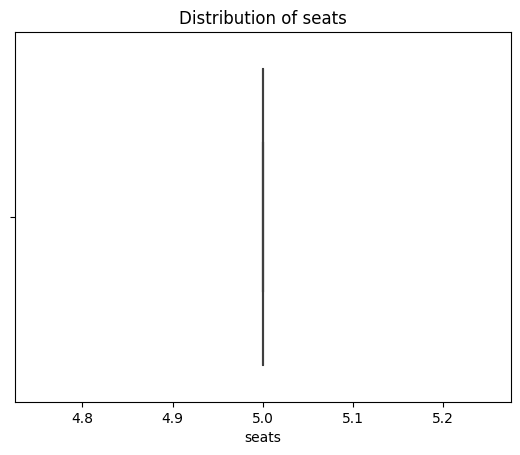

In [55]:
box_plot_uni(data, 'seats')

- After treating the outliers, the minimum and maximum `seats` treated as `5`.

- So, now there is no outliers in `seats` feature.

# Exploratory Data Analysis

## Univariate Analysis

### 1. Categorical variables

In [56]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5


In [57]:
def value_counts(column: str = None):
    print(f'{data[column].value_counts()}')

In [58]:
def count_plot_uni(data: pd.DataFrame = None, column: str = None, hue: str = None):
    sns.countplot(data=data, x=column, hue=hue)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=75)
    plt.show()

In [59]:
value_counts('fuel')

fuel
Diesel    3747
Petrol    3065
CNG         56
LPG         38
Name: count, dtype: int64


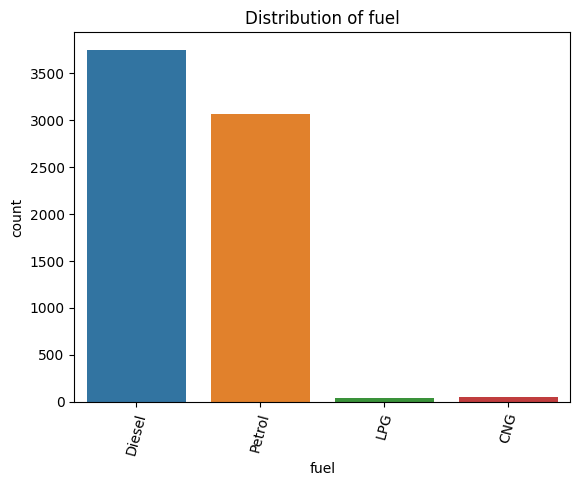

In [60]:
count_plot_uni(data=data, column='fuel')

- `Diesel and Petrol` are the most common fuel types in the dataset, with `3747 and 3065` occurrences, respectively. This suggests that these two fuels are the predominant choices among the vehicles in the dataset.
- `CNG (Compressed Natural Gas)` and `LPG (Liquefied Petroleum Gas)` are less common fuel types, with `56 and 38` occurrences, respectively. These alternative fuel options are relatively scarce compared to Diesel and Petrol.

In [61]:
value_counts('seller_type')

seller_type
Individual          6198
Dealer               681
Trustmark Dealer      27
Name: count, dtype: int64


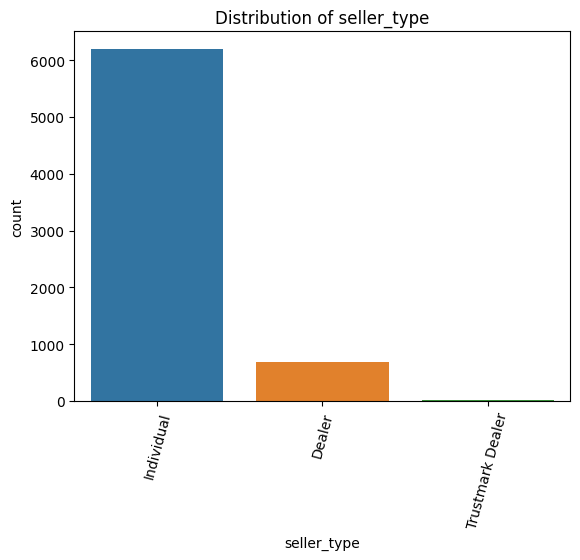

In [62]:
count_plot_uni(data=data, column='seller_type')

- `Individual sellers` are the most common in the dataset, with `6198` occurrences. This suggests that a significant portion of the vehicles listed in the dataset are sold by individual owners.
- `Dealer sellers` are the second most common category, with `681` occurrences. This indicates that there is also a substantial presence of professional dealers or businesses selling vehicles.
- `Trustmark Dealer sellers` are the least common category, with only `27` occurrences. This category may represent a specific subset of dealers who have gained trust or certification in the market.

In [63]:
value_counts('transmission')

transmission
Manual       6322
Automatic     584
Name: count, dtype: int64


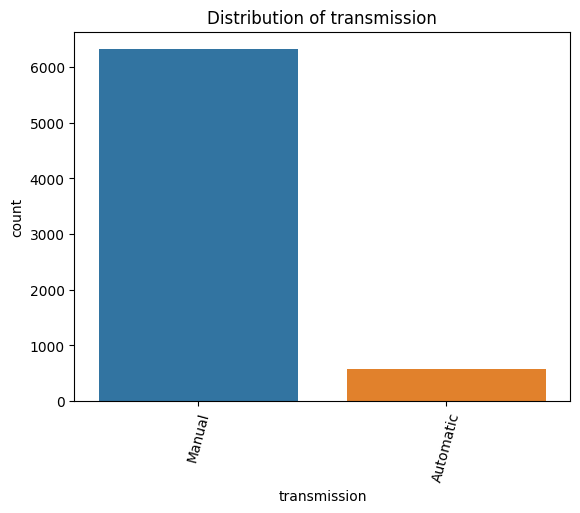

In [64]:
count_plot_uni(data=data, column='transmission')

- The majority of vehicles in the dataset have a `Manual transmission`, with `6322` instances. This indicates that manual transmissions are more common among the listed vehicles.
- `Automatic transmission` is the second most common category, with `584` occurrences. This suggests that there is also a presence of vehicles with automatic transmissions, though they are less common than manual ones.

In [65]:
value_counts('owner')

owner
First Owner             4225
Second Owner            1971
Third Owner              536
Fourth & Above Owner     169
Test Drive Car             5
Name: count, dtype: int64


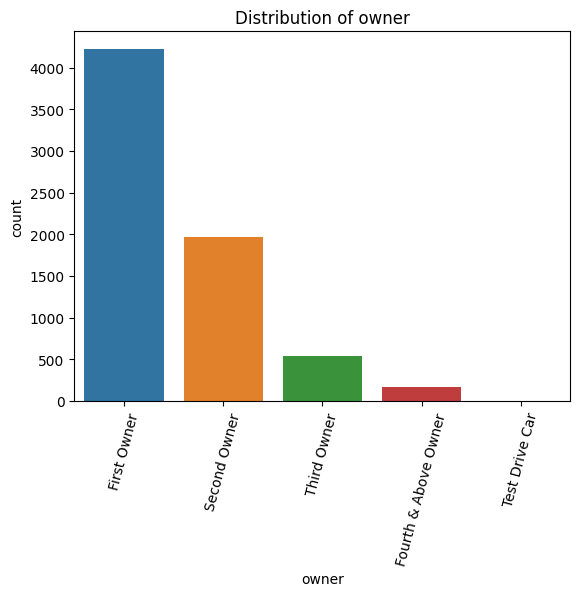

In [66]:
count_plot_uni(data=data, column='owner')

- The majority of vehicles in the dataset are `First Owner` cars, totaling `4225` instances. This indicates that a significant proportion of listed vehicles have had only one previous owner.
- `Second Owner` vehicles are the second most common category, with `1971` occurrences. This suggests that a substantial number of vehicles have had two owners.
- A smaller number of vehicles have had `Third Owner` with `536` instances and `Fourth & Above Owner` with `169` instances. These categories represent cars with multiple previous owners.
- There are also a few instances `5` categorized as `Test Drive Car`, which implies that these vehicles were primarily used for test drives or demonstrations.

### 2. Numerical variables

In [67]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5


In [68]:
def dis_plot_uni(data: pd.DataFrame = None, column: str = None, bins: int = None):
    sns.displot(x=column, kde=True, data=data, bins=bins)
    plt.title(f'Distribution of {column}')
    plt.show()

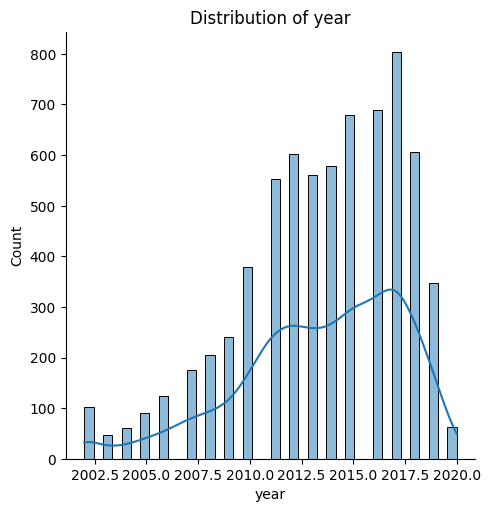

In [69]:
dis_plot_uni(data, 'year', bins=40)

- The `year` column represents the manufacturing year of the vehicles in the dataset.
-  The most frequently occurring years are `2017, 2016, and 2015`, with `803, 689, and 679` occurrences, respectively. This suggests that the dataset contains a substantial number of relatively recent vehicle models.

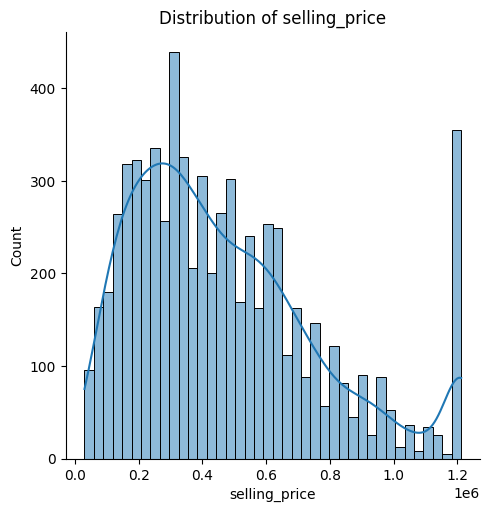

In [70]:
dis_plot_uni(data, 'selling_price', bins=40)

- The `selling_price` column represents the prices at which vehicles are listed for sale.
- Prices appear to vary widely, with the most common prices falling in the range of approximately `300,000 to 600,000`, as indicated by the high frequency of occurrences in this range.
- The dataset includes a wide variety of prices, ranging from as low as `30,000` to as high as `1,211,875`. This diversity reflects the range of vehicle values in the market.

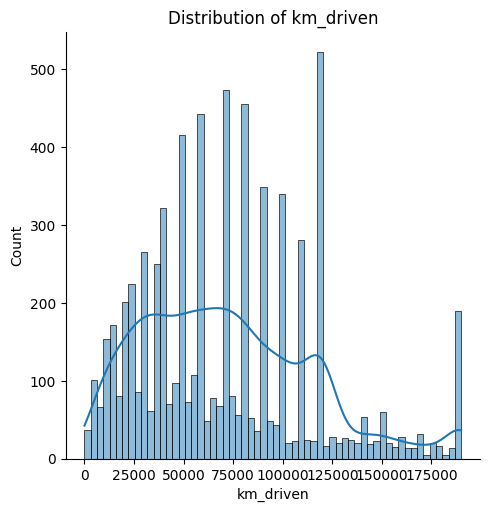

In [71]:
dis_plot_uni(data, 'km_driven', bins=60)

- The data shows that the majority of cars in your dataset have mileage values between `20,000 km and 120,000 km`.

- The most popular mileage range among the cars is around `70,000 km to 120,000 km`, as evidenced by the highest counts in this range.

- There are relatively fewer cars with very low mileage values, such as `5,000 km` or below

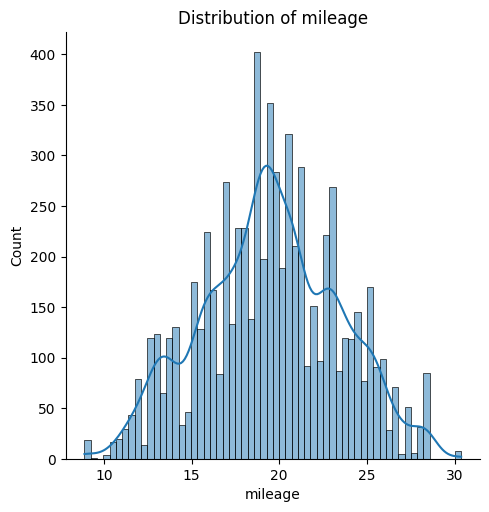

In [72]:
dis_plot_uni(data, 'mileage', bins=60)

- The mileage values vary significantly, ranging from very low values `(e.g., around 8.89)` to relatively high values `(e.g., around 30.38)`. This indicates that there is a wide diversity in the mileage of the cars..
- Some mileage values appear more frequently in the dataset, such as approximately `18.90, 19.42, and 19.70`. These values might represent common mileage readings among the cars in your dataset.

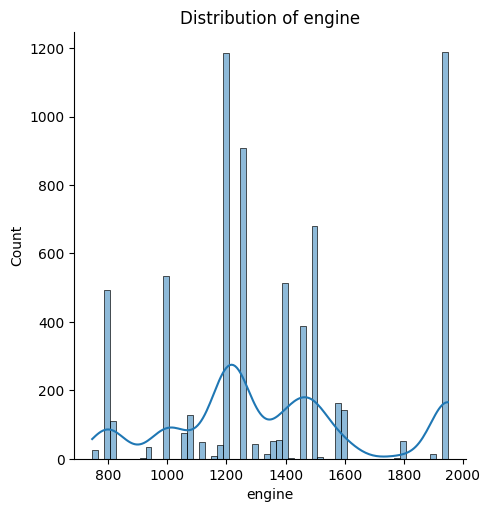

In [73]:
dis_plot_uni(data, 'engine', bins=60)

- The dataset contains a variety of engine sizes, but some engine sizes are more common than others. For example, engine sizes around `1,200cc (cubic centimeters)` and `1,500cc` appear to be quite common, with `1,178 and 907` occurrences, respectively. Smaller engine sizes like `800cc and 1,000cc` are also relatively common.
- There is significant variability in engine sizes, ranging from very small engines `(e.g., around 800cc)` to larger ones `(e.g., around 1,950cc)`. This suggests that the dataset includes cars with a wide range of engine displacements.

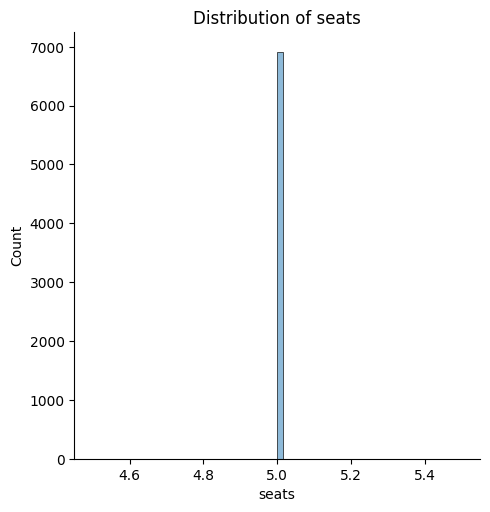

In [74]:
dis_plot_uni(data, 'seats', bins=60)

- The data shows that all the cars in your dataset have a seating capacity of `5`. 
- This suggests that the dataset may be limited to a specific category of cars.

## Bivariate Analysis

### 1. Categorical variables

In [75]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5


In [76]:
def count_plot_bi(data: pd.DataFrame = None, x_column: str = None, y_column: str = None):
    plt.figure(figsize=(15,5))
    sns.countplot(data=data, x=x_column, hue=y_column)
    plt.title(f'Distribution of {x_column}')
    plt.xticks(rotation=75)
    plt.show()

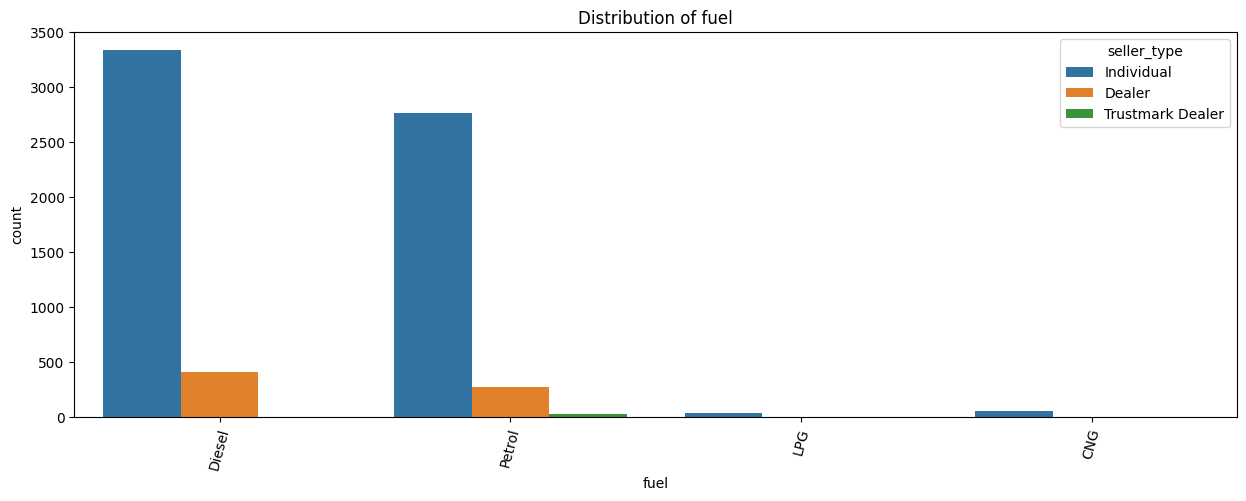

In [77]:
count_plot_bi(data, 'fuel', 'seller_type')

- Among individual sellers, the most commonly sold fuel type is `Diesel`, accounting for `3400 Individual`, followed closely by `Petrol`, which saw `2800 Individual`.

- `Diesel` vehicles were purchased by `400 dealers`, while `Petrol` vehicles were preferred by `380 dealers`.

- The remaining `27 Trustmark Dealers` exclusively dealt in petrol cars.

- `LPG and CNG` vehicles had the lowest sales figures among individual buyers.

In [78]:
def bar_plot_bi(data: pd.DataFrame = None, x_column: str = None, y_column: str = None, hue: str = None):
#     plt.figure(figsize=(15,5))
    sns.barplot(data=data, x=x_column, y=y_column, hue=hue)
    plt.title(f'Distribution of {x_column}')
    plt.xticks(rotation=75)
    plt.show()

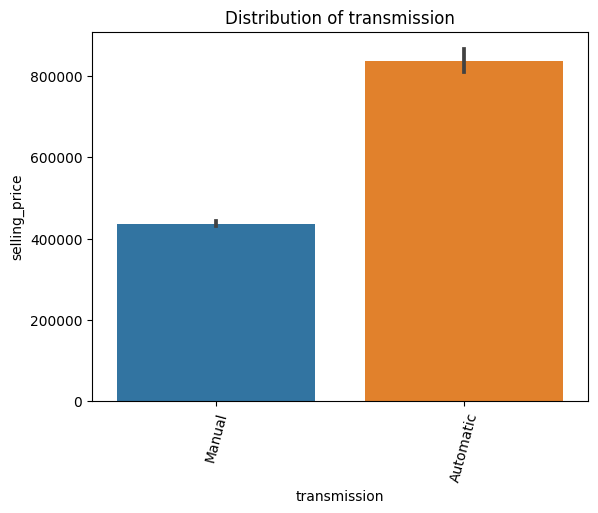

In [79]:
bar_plot_bi(data, 'transmission', 'selling_price')

- The average selling price of Manual cars was `4.2 Lakhs`.

- Automatic cars were sold at an average price of `9 Lakhs`.

In [80]:
def pivot_table(index: str = None, column: str = None, values: str = None):
    return pd.DataFrame(data.pivot_table(index=index, columns=column, values=values))

In [81]:
pivot_table('seller_type', 'fuel', 'selling_price')

fuel,CNG,Diesel,LPG,Petrol
seller_type,,,,
Dealer,NaN,771876.199507,167500.0,547007.725275
Individual,300499.946429,542058.467945,202250.0,337807.069364
Trustmark Dealer,NaN,841666.666667,NaN,669828.125000


- Diesel cars tend to have the highest average selling prices across all seller types. `Dealer` sold diesel cars have an average selling price of approximately `7,71,876.20 Lakhs`, while `individual` sold diesel cars also command a high average price of around `5,42,058.47 Lakhs`. `Trustmark dealers` also offer diesel cars at a premium, with an average price of approximately `8,41,666.67 Lakhs`.


- Petrol cars have relatively lower average selling prices compared to diesel. `Dealer` sold petrol cars average around `5,47,007.73 Lakhs`, `individual` sold petrol cars are priced at approximately `3,37,807.07 Lakhs`, and `trustmark dealers` sell them at an average price of around `6,69,828.13 Lakhs`.


- `CNG and LPG` cars, both for dealers and individual sellers, generally have lower average selling prices compared to diesel and petrol cars. However, it's worth noting that there are NaN (missing) values in the table for some combinations, indicating that certain seller types do not offer `CNG or LPG` cars.

### 2. Numerical variables

In [82]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5


In [83]:
def scatter_plot_bi(data: pd.DataFrame = None, x_column: str = None, y_column: str = None, hue: str = None):
    plt.figure(figsize=(15,5))
    plt.title(f'Distribution of {x_column}')
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue)
# x-axis = Numerical variable, y-axis = Numerical variable

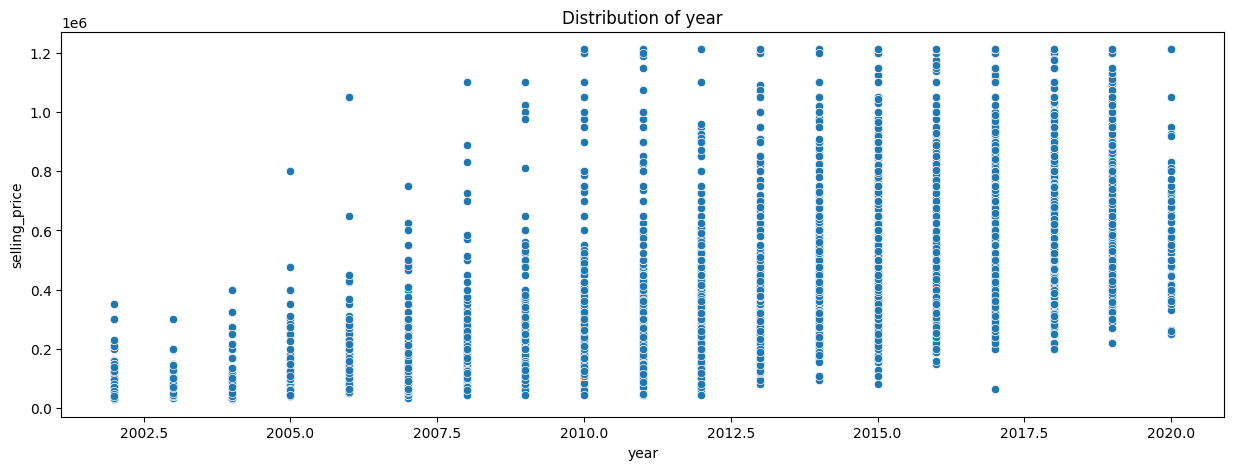

In [84]:
scatter_plot_bi(data, 'year', 'selling_price')

- The year `2020` stands out with the highest selling price, reaching `12 lakhs`, followed closely by `2019`, which also boasts a selling price approximately equal to that of `2020`.

- The selling prices between `2010` and `2016` exhibit a relatively uniform distribution at the higher end of the spectrum.

- There appears to be a discernible linear distribution pattern spanning from `2003 to 2009`.

In [85]:
def box_plot_bi(data: pd.DataFrame = None, x_column: str = None, y_column: str = None, hue: str = None):
    sns.boxplot(data=data, x=x_column, y=y_column, hue=hue)
    plt.title(f'Distribution of {y_column} for {x_column}')
# x-axis = categorical variable, y-axis = Numerical variable

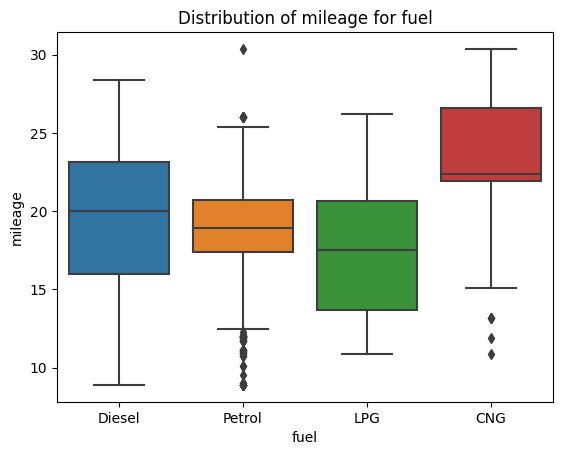

In [86]:
box_plot_bi(data, 'fuel', 'mileage')

- It appears that CNG (Compressed Natural Gas) yields the highest mileage in the dataset, topping out at an impressive `30.375` kilometers per liter (kmpl), closely followed by diesel, which achieves `28.09` kmpl.

- LPG (Liquefied Petroleum Gas) also demonstrates commendable performance, delivering `26` kmpl based on the dataset.

- However, it's worth noting that diesel engines exhibit relatively low mileage, with an average of only `8.8950` kmpl in the dataset.
